In [52]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 64
num_classes = 1
epochs = 5

# input image dimensions
img_rows, img_cols = 70, 70



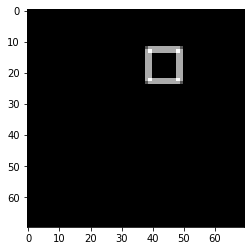

0


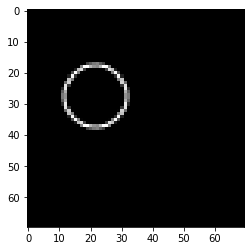

1


100%|██████████| 1000/1000 [00:03<00:00, 284.62it/s]


In [53]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense


trainxs = []
trainximgs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\squarevscircle"

CATEGORIES = ["square", "circle"]
#CATEGORIES = ["out_square", "in_square", "on_line"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break


for category in CATEGORIES:  

    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=notinsquare 1=insquare

    for img in tqdm(os.listdir(path)):  # iterate over each image per point value
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        new_img_array = rotate(img_array, 90)
        new_img_array1 = rotate(img_array, 180)
        new_img_array2 = rotate(img_array, 270)

        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainys.append(class_num)
        trainxs.append(new_img_array)
        trainxs.append(new_img_array1)
        trainxs.append(new_img_array2)
        trainxs.append(img_array)
            


In [54]:
from sklearn.model_selection import train_test_split

trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.float32)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)


print(x_train.shape)

(6400, 70, 70)


In [55]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(6400, 70, 70, 1)

In [56]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Conv2D(32, kernel_size=(9, 9),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (6400, 70, 70, 1)
x_train shape: (6400, 70, 70, 1)
6400 train samples
1600 test samples
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 62, 62, 32)        2624      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               7372928   
____________

In [57]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 6400 samples, validate on 1600 samples
Epoch 1/5
6400/6400 [==============================] - ETA: 3:01 - loss: 0.6924 - accuracy: 0.54 - ETA: 2:45 - loss: 0.6908 - accuracy: 0.55 - ETA: 2:35 - loss: 0.6898 - accuracy: 0.56 - ETA: 2:29 - loss: 0.6890 - accuracy: 0.55 - ETA: 2:24 - loss: 0.6895 - accuracy: 0.52 - ETA: 2:21 - loss: 0.6886 - accuracy: 0.50 - ETA: 2:17 - loss: 0.6894 - accuracy: 0.49 - ETA: 2:17 - loss: 0.6875 - accuracy: 0.50 - ETA: 2:14 - loss: 0.6820 - accuracy: 0.51 - ETA: 2:11 - loss: 0.6768 - accuracy: 0.52 - ETA: 2:08 - loss: 0.6902 - accuracy: 0.52 - ETA: 2:05 - loss: 0.6900 - accuracy: 0.52 - ETA: 2:04 - loss: 0.6899 - accuracy: 0.51 - ETA: 2:03 - loss: 0.6899 - accuracy: 0.52 - ETA: 2:02 - loss: 0.6896 - accuracy: 0.51 - ETA: 2:00 - loss: 0.6884 - accuracy: 0.51 - ETA: 1:58 - loss: 0.6886 - accuracy: 0.52 - ETA: 1:57 - loss: 0.6884 - accuracy: 0.52 - ETA: 1:55 - loss: 0.6872 - accuracy: 0.52 - ETA: 1:53 - loss: 0.6862 - accuracy: 0.52 - ETA: 1:51 - loss:

6400/6400 [==============================] - ETA: 2:11 - loss: 0.5012 - accuracy: 0.68 - ETA: 2:08 - loss: 0.5054 - accuracy: 0.71 - ETA: 2:07 - loss: 0.5010 - accuracy: 0.72 - ETA: 2:05 - loss: 0.5087 - accuracy: 0.70 - ETA: 2:03 - loss: 0.5216 - accuracy: 0.69 - ETA: 2:02 - loss: 0.5188 - accuracy: 0.68 - ETA: 2:02 - loss: 0.5174 - accuracy: 0.66 - ETA: 2:03 - loss: 0.5294 - accuracy: 0.65 - ETA: 2:02 - loss: 0.5722 - accuracy: 0.64 - ETA: 2:01 - loss: 0.5675 - accuracy: 0.64 - ETA: 2:00 - loss: 0.5646 - accuracy: 0.65 - ETA: 1:59 - loss: 0.5617 - accuracy: 0.65 - ETA: 1:57 - loss: 0.5562 - accuracy: 0.65 - ETA: 1:56 - loss: 0.5547 - accuracy: 0.65 - ETA: 1:55 - loss: 0.5552 - accuracy: 0.65 - ETA: 1:53 - loss: 0.5583 - accuracy: 0.65 - ETA: 1:52 - loss: 0.5564 - accuracy: 0.65 - ETA: 1:50 - loss: 0.5553 - accuracy: 0.65 - ETA: 1:49 - loss: 0.5563 - accuracy: 0.64 - ETA: 1:48 - loss: 0.5550 - accuracy: 0.64 - ETA: 1:46 - loss: 0.5537 - accuracy: 0.64 - ETA: 1:45 - loss: 0.5526 - accu

6400/6400 [==============================] - ETA: 2:11 - loss: 0.5138 - accuracy: 0.64 - ETA: 2:09 - loss: 0.5278 - accuracy: 0.60 - ETA: 2:08 - loss: 0.5254 - accuracy: 0.63 - ETA: 2:06 - loss: 0.5274 - accuracy: 0.63 - ETA: 2:04 - loss: 0.5149 - accuracy: 0.64 - ETA: 2:03 - loss: 0.5098 - accuracy: 0.65 - ETA: 2:02 - loss: 0.5179 - accuracy: 0.65 - ETA: 2:01 - loss: 0.5162 - accuracy: 0.64 - ETA: 2:01 - loss: 0.5204 - accuracy: 0.63 - ETA: 2:00 - loss: 0.5186 - accuracy: 0.63 - ETA: 1:59 - loss: 0.5179 - accuracy: 0.63 - ETA: 1:58 - loss: 0.5208 - accuracy: 0.63 - ETA: 1:56 - loss: 0.5216 - accuracy: 0.62 - ETA: 1:55 - loss: 0.5252 - accuracy: 0.61 - ETA: 1:53 - loss: 0.5277 - accuracy: 0.61 - ETA: 1:52 - loss: 0.5256 - accuracy: 0.61 - ETA: 1:50 - loss: 0.5241 - accuracy: 0.61 - ETA: 1:49 - loss: 0.5263 - accuracy: 0.61 - ETA: 1:48 - loss: 0.5270 - accuracy: 0.61 - ETA: 1:47 - loss: 0.5253 - accuracy: 0.61 - ETA: 1:46 - loss: 0.5267 - accuracy: 0.61 - ETA: 1:44 - loss: 0.5272 - accu

6400/6400 [==============================] - ETA: 2:10 - loss: 0.4707 - accuracy: 0.60 - ETA: 2:08 - loss: 0.4897 - accuracy: 0.64 - ETA: 2:07 - loss: 0.4924 - accuracy: 0.65 - ETA: 2:06 - loss: 0.4889 - accuracy: 0.64 - ETA: 2:04 - loss: 0.4907 - accuracy: 0.64 - ETA: 2:03 - loss: 0.4955 - accuracy: 0.64 - ETA: 2:02 - loss: 0.5031 - accuracy: 0.62 - ETA: 2:01 - loss: 0.5068 - accuracy: 0.63 - ETA: 2:01 - loss: 0.5012 - accuracy: 0.65 - ETA: 2:00 - loss: 0.5033 - accuracy: 0.65 - ETA: 1:59 - loss: 0.5049 - accuracy: 0.65 - ETA: 1:58 - loss: 0.5062 - accuracy: 0.64 - ETA: 1:56 - loss: 0.5047 - accuracy: 0.64 - ETA: 1:55 - loss: 0.5058 - accuracy: 0.64 - ETA: 1:53 - loss: 0.5068 - accuracy: 0.64 - ETA: 1:52 - loss: 0.5116 - accuracy: 0.64 - ETA: 1:50 - loss: 0.5129 - accuracy: 0.64 - ETA: 1:49 - loss: 0.5121 - accuracy: 0.64 - ETA: 1:48 - loss: 0.5142 - accuracy: 0.64 - ETA: 1:47 - loss: 0.5155 - accuracy: 0.63 - ETA: 1:46 - loss: 0.5147 - accuracy: 0.64 - ETA: 1:45 - loss: 0.5141 - accu

6400/6400 [==============================] - ETA: 2:29 - loss: 0.5190 - accuracy: 0.60 - ETA: 2:37 - loss: 0.5150 - accuracy: 0.64 - ETA: 2:42 - loss: 0.5348 - accuracy: 0.62 - ETA: 2:47 - loss: 0.5229 - accuracy: 0.62 - ETA: 2:42 - loss: 0.5201 - accuracy: 0.61 - ETA: 2:36 - loss: 0.5133 - accuracy: 0.61 - ETA: 2:30 - loss: 0.5158 - accuracy: 0.61 - ETA: 2:25 - loss: 0.5135 - accuracy: 0.62 - ETA: 2:22 - loss: 0.5249 - accuracy: 0.62 - ETA: 2:19 - loss: 0.5255 - accuracy: 0.62 - ETA: 2:18 - loss: 0.5243 - accuracy: 0.62 - ETA: 2:16 - loss: 0.5221 - accuracy: 0.62 - ETA: 2:14 - loss: 0.5221 - accuracy: 0.62 - ETA: 2:12 - loss: 0.5244 - accuracy: 0.61 - ETA: 2:09 - loss: 0.5263 - accuracy: 0.61 - ETA: 2:07 - loss: 0.5288 - accuracy: 0.60 - ETA: 2:06 - loss: 0.5315 - accuracy: 0.60 - ETA: 2:04 - loss: 0.5344 - accuracy: 0.60 - ETA: 2:02 - loss: 0.5326 - accuracy: 0.60 - ETA: 2:00 - loss: 0.5333 - accuracy: 0.60 - ETA: 1:58 - loss: 0.5306 - accuracy: 0.60 - ETA: 1:56 - loss: 0.5306 - accu

In [38]:
print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


model = Sequential()
model.add(Flatten())
model.add(Dense(4900, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


yes
x_train shape: (6400, 70, 70, 1)
x_train shape: (6400, 70, 70, 1)
6400 train samples
1600 test samples


In [33]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

print("yes")
print('x_train shape:', x_train.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(70,70,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

yes
x_train shape: (6400, 70, 70, 1)
x_train shape: (6400, 70, 70, 1)
6400 train samples
1600 test samples


C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
C:\Users\colly\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activati

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 70, 70, 64)        640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 35, 35, 128)      